## Analyse A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - Hypothesis Testing](#hypothesis_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)


<a id='intro'></a>
### Introduction

For this project, we analyse the results of an A/B test run by an e-commerce website.  The goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
#number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
#number of unique converted users
conv_users=df.query('converted==1').user_id.nunique()
#Proportion of unique users converted
conv_users_prop=conv_users/df['user_id'].nunique()
conv_users_prop

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df[(df['group'] == 'treatment') != (df['landing_page'] == 'new_page')].shape[0]
#df[(df['group'] == 'control') != (df['landing_page'] == 'old_page')].shape[0]

3893

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


None.All 294478 rows have non-null entries.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#Create a new dataset by filtering the rows where the group is associated with the right landing page
df2=df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))==True]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique() 

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.user_id.value_counts().sort_values(ascending=False).head(1)

773192    2
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#consider the data excluding any one of the duplicated ids
df2 =df2[df2.index !=1899]

In [16]:
#cross check if the repeated id is present
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
p_converted=df2.converted.mean()
p_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
p_control = df2.query('group=="control"').converted.mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
p_treatment = df2.query('group=="treatment"').converted.mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
p_newpage=df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]
p_newpage

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

** The probability of conversion to new page is lower than the old page by a very small margin.That being said there is limited information to suggest that new page will not have better conversions with given information as other factors can affect the new page conversion for instance, duration of the experiment/test.**

<a id='hypothesis_test'></a>
### Part II - Hypothesis Testing

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**
$$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

**Assume per point 2:**
    
$$H_0: p_{new} =  p_{old}$$
$$H_1: p_{new} \neq p_{old}  $$

a. What is the **convert rate** for $p_{new}$ under the null? 

From above assumption,pnew and pold  have "true" success rates  equal to the converted rate in ab_data.csv regardless of the page. 

In [21]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

n_new is the number of records with landing_page type, new_page

In [23]:
n_new=df2[df2['landing_page']=="new_page"].shape[0]
n_new

145310

d. What is $n_{old}$?

n_old is the number of records with landing_page type, old_page

In [24]:
n_old=df2[df2['landing_page']=="old_page"].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(n_new,p_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(n_old,p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
(new_page_converted/n_new) - (old_page_converted/n_old)

-0.0015231586941583386

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [28]:
#Sampling distribution.Updated per review:replaced for loop for sampling distribution with in-built function's parameter,size.
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

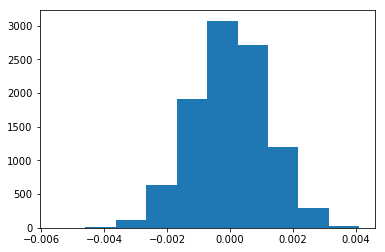

In [29]:
np.array(p_diffs)
plt.hist(p_diffs);

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

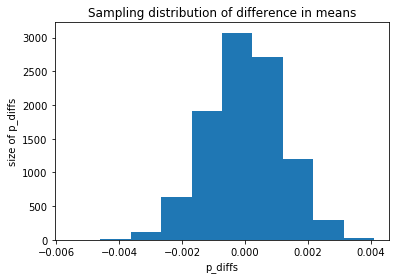

In [30]:
#plot the sampling distribution of the difference in means.
#We see the application of central limit theorem to the sampling distribution 
#of the difference in means.
np.array(p_diffs)
plt.hist(p_diffs);
plt.xlabel('p_diffs')
plt.ylabel('size of p_diffs')
plt.title('Sampling distribution of difference in means')
#plt.axvline(actual_diff,color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
p_old_actual=df2.query('group=="control"').converted.mean()
p_new_actual=df2.query('group=="treatment"').converted.mean()
actual_diff=(p_new_actual - p_old_actual)
actual_diff

-0.0015782389853555567

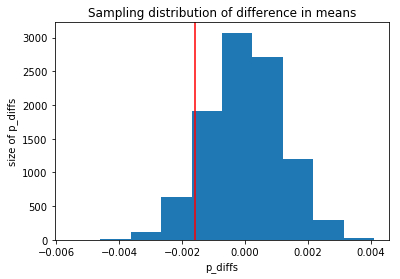

In [32]:
#Sampling distribution of difference of means with actual difference
np.array(p_diffs)
plt.hist(p_diffs);
plt.xlabel('p_diffs')
plt.ylabel('size of p_diffs')
plt.title('Sampling distribution of difference in means')
plt.axvline(actual_diff,color='r');

In [33]:
#p-value calculation
(actual_diff>p_diffs).mean()

0.094700000000000006

In [34]:
#Per the question 'proportion of the p_diffs are greater than the actual difference observed in ab_data.csv' ,then:
# ie (1-0.090999999999999998)
(p_diffs >actual_diff).mean()

0.90529999999999999

In [109]:
1-0.090999999999999998

0.909

** Proportion of the p_diffs  is greater than the actual difference observed in ab_data.csv by 90.9%**

### Optional 
** This project does not require to  use normal distribution to compute p-value. We get the same p-value of 0.9.** 

In [35]:
#compute the standard deviation of the sampling distribution of the difference in means
np.std(p_diffs)

0.0011919310007071969

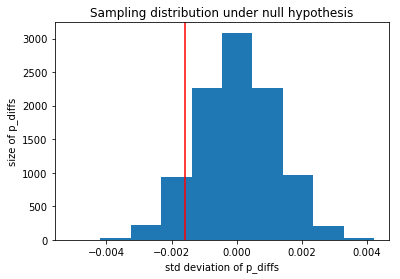

In [36]:
#Simulate the draws from the sampling distribution under null hypothesis -
# by recentering the distribution at zero
null_vals=np.random.normal(0,np.std(p_diffs),p_diffs.size)
plt.hist(null_vals);
plt.xlabel('std deviation of p_diffs')
plt.ylabel('size of p_diffs')
plt.title('Sampling distribution under null hypothesis')
#plot line for observed statistic
plt.axvline(actual_diff,color='r');

In [37]:
#std deviation 
np.std(null_vals),np.std(p_diffs)

(0.0011792242383706533, 0.0011919310007071969)

In [38]:
#pvalue calculation
(null_vals>actual_diff).mean()

0.91039999999999999

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

** Part j computes the probability of obtaining the observed statistic  or  more extreme  value in favor of the alternative given that null hypothesis is true.This value is called p-value.The p-value is large, ie greater than type I error threshold of 0.05 implying that the data came from null distribution and hence we fail to reject the null hypothesis.Per the null hypothesis, the converted success rate of new page is equal to that of old page,the changes have failed to bring about better conversions for the new page,resulting in keeping old page till say testing is continued for longer duration. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2.query('group=="control" & converted==1').shape[0]
convert_new = df2.query('group=="treatment" & converted==1').converted.shape[0]
n_old = df2.query('group=="control"').shape[0]
n_new =  df2.query('group=="treatment"').shape[0]
convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
#proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
#count=number of success in terms of converted pages,nobs=number of trials, 
#The alternative hypothesis can be either two-sided or one of the one- sided tests, 
#smaller means that the alternative hypothesis is prop < value` and larger means ``prop > value, or 
#the corresponding inequality for the two sample test.
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old],alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

In [104]:
#norm.cdf(z_score) indicates the significance of the zscore. For a 2 tailed 
#test, z-score past the +/- critical value is significant.For a CI of
#95% z-score past -1.96 or 1.96 is significant
#norm.ppf(1-(0.05/2)) gives the critical value associated with 95% CI
from scipy.stats import norm

norm.cdf(z_score),norm.ppf(1-(0.05/2))

(0.094941687240975514, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since Z-score computed is within the critical value rangeie -1.96< -1.31 < 1.96, we fail to reject the null hypothesis as the value is outside the rejection region.The p-value computed is 0.9 which is > 0.05(p-value associated with 95% CI).The conversion proportion is  0.1188 for  new page which  is lower than that of old page, 0.1203. The new page is  not better than the old page. This concurs with the findings in part 'j' and 'k'. We fail to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression - Statistical technique with two possible outcomes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is when an individual receives the **treatment** and 0 if **control**.

In [39]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [40]:
#create a column for the intercept and a dummy variable column for which page each user received.
df2['intercept']=1
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']

In [41]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [42]:
logit=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 22 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        17:21:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [43]:
#exponentiate the coefficients to get the muliplicative change in the odds
np.exp(-0.0150)

0.98511193960306265

In [44]:
#compute the reciprocal for multiplicative change less than 1. 
#This changes the unit increase to unit decrease
1/_

0.00010001000100010001

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

**1.P-value associated with variable,ab_page is large, 0.19 > thresold value of 0.05.We can infer that that we fail to reject the null hypothesis.**


**2.The conversion is 0.0001 times more likely on recieving new page than old page, holding all other variables constant.(which is none). **

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**P-value associated with ab_page is 0.19 where as p-value computed in Part II is 0.9.
The p-value in Part II differs from that of the regression model due to null hypothesis and alternative hypotheis consideration. **

**In Part II, the null and alternative hypothesis assumed:**
**$$H_0: p_{new}− p_{old} ≤0 $$
$$H_1: p_{new}− p_{old} >0 $$**


** Null and alternative hypothesis in Regression model: **
**$$H_0: p_{new} =  p_{old}$$
$$H_1: p_{new} \neq p_{old}$$ **

**P-value can be converted between one and two-tail test.One-tail P value is half the two-tail P value while
the two-tail P value is twice the one-tail P value (considering the  predicted direction, known by the sign of the coefficient).**

**The p-value in Part III is 0.19 with -ve coefficient.Half of 0.19 is 0.095 and considering the direction, 1 - 0.095=0.9 which is the p-value obtained Part II.**

*** Referenced articles are listed in the final cell (after Conclusions section).***

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In multi variable logistic regression,adding additional terms/features allows analysis of each of these predictor variables' relative influence on the response variable.For instance,factors like duration,page views,ets.This would help in selective inclusion of these factors which are significant. **

**Multiple predictors help assess confounding wherein, the confounding variable influences the predictor and the response variable,help understand how relevant it is and know the odds.This also helps identify and omit variables that add noise.**

**While using multiple logistic regression(MLR), the colinearity between predictors should be checked as these can affect the direction of the coefficents and cause over-fitting of the model.Variables with p-value > threshold level should be considered.**

*** Referenced articles are listed in the final cell (after Conclusions section).***

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df=pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
countries_df=countries_df.set_index('user_id')

In [47]:
countries_df.head()

,country
user_id,
834778,UK
928468,US
822059,UK
711597,UK
710616,UK


In [48]:
df2_new=countries_df.join(df2.set_index('user_id'),how='inner')

In [49]:
df2_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [50]:
df2_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [51]:
#create dummy variables with US as baseline
df2_new[['CA','UK']]=pd.get_dummies(df2_new['country'])[['CA','UK']]

In [52]:
#correlation between ab_page and country
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# get y and X dataframes based on this regression:
y, X = dmatrices('converted ~ ab_page + CA +UK' , df2_new, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.428940,Intercept
1,1.000006,ab_page
2,1.017759,CA
3,1.017761,UK


**The VIF factor for each of the coeffiecients   is less than 5,hence there is no colinearity.**

In [54]:
#Considering country alone as the explanatory variable
df2_new['intercept']=1
logit_c=sm.Logit(df2_new['converted'],df2_new[['intercept','CA','UK']])
result_c=logit_c.fit()
result_c.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 22 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        17:21:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [55]:
np.exp(result_c.params)

intercept    0.135779
CA           0.960018
UK           1.009966
dtype: float64

In [56]:
1/np.exp(result_c.params)

intercept    7.364925
CA           1.041647
UK           0.990133
dtype: float64

**Impact of country of conversion
The p-value is not significant with countries Canada and UK having p-value of 0.129 and 0.456 both of which are > thresold significance level of 5%(thresold value of Type I error rate). **

**Conversion is 1.00 times as likely by a UK based user holding all else constant.**

**With country as the explanatory variable, the p-value is large and with this we fail to reject null.Influence of Country variable has not affected the failure to reject null.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [57]:
df2_new['intercept']=1
logit2=sm.Logit(df2_new['converted'],df2_new[['intercept','ab_page','CA','UK']])
result2=logit2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 22 Mar 2018   Pseudo R-squ.:               2.323e-05
Time:                        17:21:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [58]:
#exponentiate the coefficients to get the muliplicative change in the odds
np.exp(result2.params)

intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64

In [59]:
#compute the reciprocal for multiplicative change less than 1. 
#This changes the unit increase to unit decrease
1/np.exp(result2.params)

intercept    7.310207
ab_page      1.015056
CA           1.041599
UK           0.990165
dtype: float64

In [60]:
#Adding interaction terms
df2_new['ab_page_UK']=df2_new['ab_page'] * df2_new['UK']
df2_new['ab_page_CA']=df2_new['ab_page'] * df2_new['CA']

In [62]:
df2_new['intercept']=1
logit4=sm.Logit(df2_new['converted'],df2_new[['intercept','ab_page','CA','UK','ab_page_UK','ab_page_CA']])
result4=logit4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 22 Mar 2018   Pseudo R-squ.:               3.482e-05
Time:                        17:26:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page_UK     0.0314      0.027      1.181      0.238      -0.021       0.084
ab_page_CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

In [70]:
#odds ratio
np.exp(result4.params)

intercept     0.137178
ab_page       0.979646
CA            0.982625
UK            0.994272
ab_page_UK    1.031896
ab_page_CA    0.954198
dtype: float64

In [91]:
1/np.exp(result4.params)

intercept     7.289813
ab_page       1.020776
CA            1.017682
UK            1.005761
ab_page_UK    0.969090
ab_page_CA    1.048001
dtype: float64

*** Summary of observations: Inclusion of page and country and interaction between them to check for significant effects on conversion***

**1. The p-values for the page and country :UK,CA are > threshold p-value making them insignificant and prompts us to not 
reject the null hypothesis.**

**2.Conversion is 1.00 times as likely by a UK based user holding all else constant.**

**3. With inclusion of interaction terms,p-values are not significant favoring failure to reject null hypothesis.**

**4.With receipt of landing page from UK user, has 1 times conversion likely compared to receipt of landing page from a US user.**


<a id='conclusions'></a>
## Conclusions



**
The observations and inference drawn from the above tests on the given dataset are as follows-**

**1. The p-values associated with the coeffcients are insignificant and hence do not contribute to the outcome of conversion ie implement new landing page**

**2. With p-values greater than significance level,prompts us to conclude that we fail to reject the null.**

**3. We would need relevant predictor variables that influence the conversion to new page and henc achieve the goal of implementting the new page.**

**4. The e-commerce website will have to increase the duration of experiment and also introduce additional predictors that will aid in making an affirmative statement on new page implementation.**


### References :

https://fsu.digital.flvc.org/islandora/object/fsu:253957/datastream/PDF/view

https://www.researchgate.net/post/How_is_logistic_regression_used_What_conditions_and_types_of_variables_should_be_used

https://www.researchgate.net/publication/23668289_A_Purposeful_Selection_of_Variables_Macro_for_Logistic_Regression

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5543767/#ref2

https://stats.idre.ucla.edu/other/mult-pkg/faq/pvalue-htm/